<a href="https://colab.research.google.com/github/parkkitty/test_preparation/blob/master/standardization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt


In [2]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels),(test_images, test_labels) = fashion_mnist.load_data()

In [9]:
class_names = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle Boot']


In [10]:
train_images.shape, len(train_labels)
train_labels[0]

9

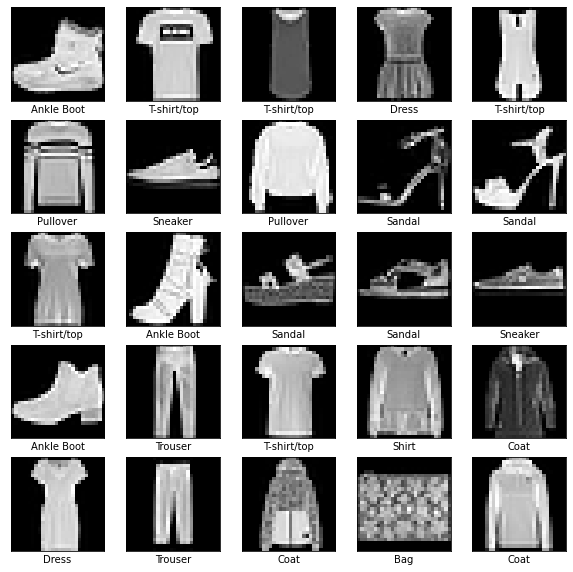

In [12]:
plt.figure(figsize=(10,10))
for i in range(25):
  #print(class_names[train_labels[i]])
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(train_images[i], cmap='gray')
  plt.xlabel(class_names[train_labels[i]])
plt.show()

In [14]:
#Sequential 모델 만들기

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)), # 28x28 = 784
    keras.layers.Dense(128, activation='sigmoid'), # 128
    keras.layers.Dense(10, activation='softmax') # 10
])

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [17]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
EPOCHS = 5

In [19]:
hist = model.fit(train_images,train_labels,epochs=EPOCHS)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6695 - accuracy: 0.7488
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6549 - accuracy: 0.7609
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6705 - accuracy: 0.7486
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6613 - accuracy: 0.7563
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6597 - accuracy: 0.7480


In [20]:
#Batch Size = 60000(전체 이미지 수) / 1875 = 32
60000/1875 

32.0

In [22]:
test_images[0].shape

(28, 28)

Text(0.5, 0, 'Sandal')

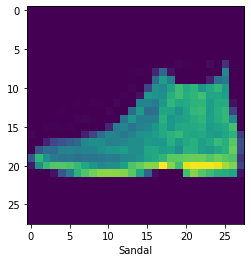

In [27]:
predictions=model.predict(test_images)
plt.imshow(test_images[0])
plt.xlabel(class_names[np.argmax(predictions[0])])

In [28]:
# mean = 0.5, std = 0.5 로 Test Data Standardization
# newX = X - 평균 / 표준편차 , Normalization = X-Xmin / Xmax - Xmin -> /255.0
train_images = (train_images/255.0 - 0.5) / 0.5
test_images = (test_images/255.0 - 0.5) / 0.5 
train_labels = tf.one_hot(train_labels, 10) # One-Hot Encoding
test_labels = tf.one_hot(test_labels, 10)

In [37]:
# Input Layer (Flatten),Output Layer(Dense 10) 사이에 Dense Layer 2개 추가 (64, 128)
# Activation relu 변경
model2 = keras.Sequential([
  keras.layers.Flatten(input_shape=(28,28)),
  keras.layers.Dense(128,activation='relu'),
  keras.layers.Dense(64,activation='relu'),
  keras.layers.Dense(10,activation='softmax')
])
model2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_6 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_7 (Dense)              (None, 10)                650       
Total params: 109,386
Trainable params: 109,386
Non-trainable params: 0
_________________________________________________________________


In [38]:
# Categorical_crossentrophy -> One hot encoding
model2.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])


In [39]:
hist2 = model2.fit(train_images,train_labels,epochs=EPOCHS)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4867 - accuracy: 0.8224
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3732 - accuracy: 0.8622
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3359 - accuracy: 0.8758
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3109 - accuracy: 0.8851
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2949 - accuracy: 0.8899


In [41]:
test_loss, test_acc = model2.evaluate(test_images,test_labels, verbose=1)
print(test_loss)
print(test_acc)

313/313 [==============================] - 0s 1ms/step - loss: 0.3725 - accuracy: 0.8673
0.37253329157829285
0.8672999739646912


In [42]:
# 1번 문제 Convolution 10 Feature Map -> MaxPooling -> Conv2D 20 Features -> MaxPooling -> Flatten -> Dropout -> FC 100 -> FC 10

model3 = keras.models.Sequential()
model3.add(keras.layers.Conv2D(10,kernel_size=(3,3),activation='relu',input_shape=(28,28,1)))
model3.add(keras.layers.MaxPool2D(pool_size=(2,2)))
model3.add(keras.layers.Conv2D(20,kernel_size=(3,3),activation='relu'))
model3.add(keras.layers.MaxPool2D(pool_size=(2,2)))
model3.add(keras.layers.Flatten())
model3.add(keras.layers.Dropout(0.5))
model3.add(keras.layers.Dense(100,activation='relu'))
model3.add(keras.layers.Dense(10,activation='softmax'))

model3.summary()


Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 10)        100       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 10)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 20)        1820      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 20)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 500)               0         
_________________________________________________________________
dropout (Dropout)            (None, 500)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 100)              

In [44]:
# Function Type

inputs = keras.layers.Input(shape=(28,28,1))

x = keras.layers.Conv2D(10,(3,3),activation='relu')(inputs)
x = keras.layers.MaxPool2D(pool_size=(2,2))(x)
x = keras.layers.Conv2D(20,(3,3),activation='relu')(x)
x = keras.layers.MaxPool2D((2,2))(x)
x = keras.layers.Flatten()(x)
x = keras.layers.Dense(100,activation='relu')(x)
outputs = keras.layers.Dense(10,activation='softmax')(x)

model4 = keras.Model(inputs,outputs)
model4.summary()



Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 26, 26, 10)        100       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 10)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 11, 11, 20)        1820      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 20)          0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 500)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 100)               50100 